In [1]:
!git clone https://github.com/qihongl/pylca
!pip install pylca
!rm -rf pylca

fatal: destination path 'pylca' already exists and is not an empty directory.


In [2]:
"""
LCA, demonstrate the effect of competition
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylca import LCA

In [3]:
def attentional_selection(weights, attention=None):
    assert weights[weights<=1].all(), "weights have to be in interval [0, 1]"
    assert weights[weights>=0].all(), "weights have to be in interval [0, 1]"
    dims, _ = weights.shape

    # randomly select dimension to focus on
    focus = np.random.choice(dims, p=attention)
    # get the weights corresponding to that focus
    weight = weights[focus,:]
    return weight

def plot_dimensions(weights):
    n_dims, n_units = weights.shape
    columns = [f"dimension {i}" for i in range(1, n_dims+1)]
    df = pd.DataFrame(
        data=weights.T,
        columns=columns
    )
    df_names = pd.DataFrame(
        data=[f"unit {i}" for i in range(1, n_units+1)],
        columns=["unit"]
    )
    df = pd.concat([df, df_names], axis=1)

    # plot
    g = sns.PairGrid(df, x_vars=columns[1:], y_vars=columns[:-1], hue="unit", height=1.1*max(n_dims, n_units))
    g.map(sns.scatterplot)
    g.set(xticks=np.arange(0, 1.1, 0.1), yticks=np.arange(0, 1.1, 0.1))
    g.add_legend(title="")
    plt.show()

In [4]:
# generate attention switches
weights = np.array([
    # unit 1  |  unit 2  | unit 3
    [0.1,        0.8,       0.45], # dim 1
    [0.8,        0.1,       0.45],  # dim 2
    [0.2,        0.2,       0.3]  # dim 3
])

# make inputs: 
T = 100 # nr. time steps
input_sequences = [
    [attentional_selection(weights) for _ in range(T)] for _ in range(3)
]

In [5]:
"""model params
"""
n_dims, n_units = weights.shape
# input weights
w_input = 1
# decision param
leak = .1
competition = 1
self_excit = 0
# time step size
dt = .2
# other params
self_excit = 0
w_cross = 0
offset = 0
noise_sd = .1

In [6]:
# init LCA
lca = LCA(
    n_units, dt, leak, competition,
    self_excit=self_excit, w_input=w_input, w_cross=w_cross,
    offset=offset, noise_sd=noise_sd,
)

"""run LCA
"""
# run LCA for all input patterns
vals = []
for input_sequence in input_sequences:
    vals.append(lca.run(input_sequence))

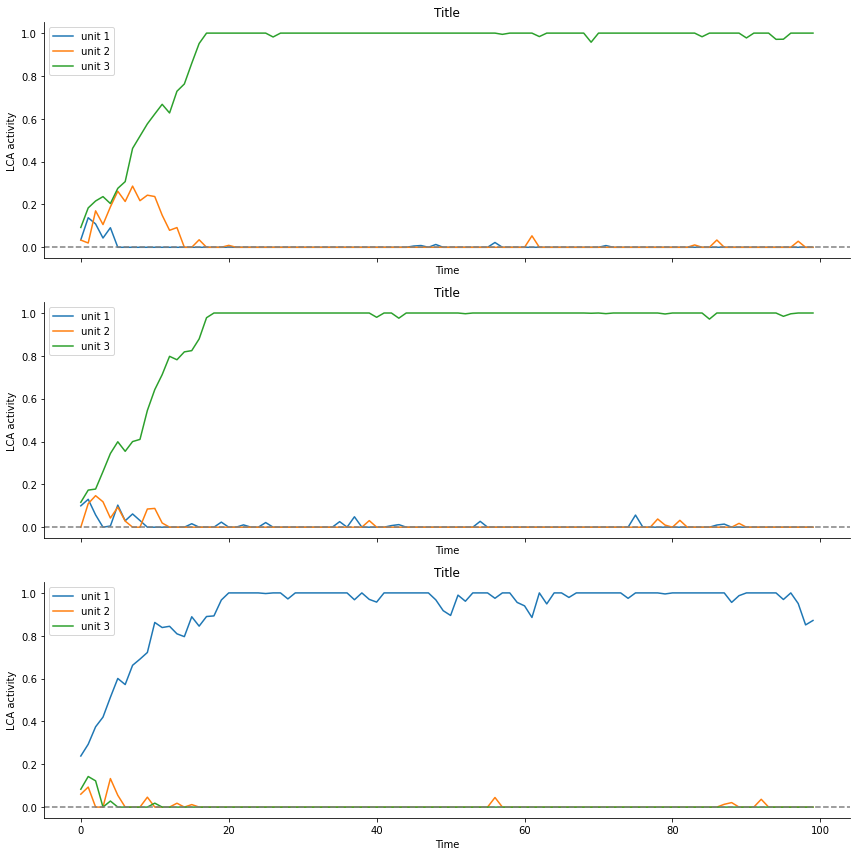

In [7]:
"""plot
if more units are activated, they compete and inhibit each other,
as a result, the uncertainty of the system is larger
"""

n_sims = len(input_sequences)

f, axes = plt.subplots(n_sims, figsize=(12, 12), sharex=True, squeeze=False)
f.tight_layout()
for i, ax in enumerate(axes[:,0]):
    for unit in range(n_units):
        ax.plot(vals[i][:,unit], label=f"unit {unit+1}")
    ax.set_title('Title')
    ax.set_ylabel('LCA activity')
    ax.set_xlabel('Time')
    ax.set_ylim([-.05, 1.05])
    ax.axhline(0, linestyle='--', color='grey')
    ax.legend()
f.tight_layout()
sns.despine()

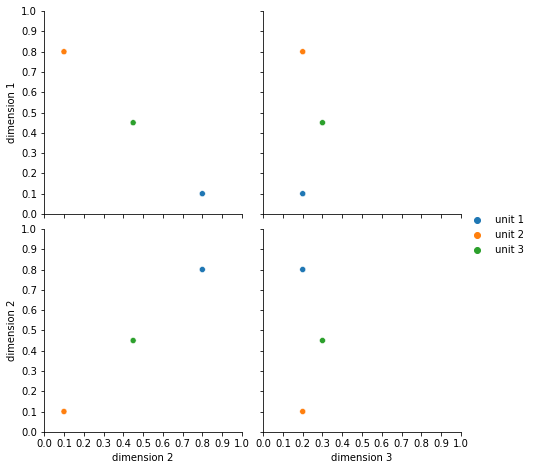

In [8]:
plot_dimensions(weights)